In [1]:
import pandas as panditas
from sklearn.linear_model import LinearRegression

In [44]:
import pandas as pd
import numpy as np

motor = np.random.uniform(1.0, 5.0, 1000)

co2 = 50 * motor + np.random.normal(0, 20, 1000)

data = {
    "T_MOTOR": motor,
    "CO2": co2
}

df = pd.DataFrame(data)
df.to_csv("motor_co2.csv", index=False)

df = pd.read_csv("motor_co2.csv")
print(df.head())

    T_MOTOR         CO2
0  4.442355  247.313354
1  3.793474  159.640840
2  4.328339  238.683618
3  4.255362  192.278956
4  4.774201  255.570945


In [45]:
df

,T_MOTOR,CO2
0,4.442355,247.313354
1,3.793474,159.640840
2,4.328339,238.683618
3,4.255362,192.278956
4,4.774201,255.570945
...,...,...
995,2.118802,84.448284
996,4.033941,229.371683
997,1.151336,41.094061
998,4.623078,219.175954


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
train, test = train_test_split(df, test_size = 0.30)

In [48]:
print("Ejemplos usados para entrenar:", len(train))

print("Ejemplos usados para prueba: ", len(test))

Ejemplos usados para entrenar: 700
Ejemplos usados para prueba:  300


In [49]:
train_x = train[['T_MOTOR']]
train_y = train[['CO2']]
test_x = test[['T_MOTOR']]
test_y = test[['CO2']]

In [50]:
df

,T_MOTOR,CO2
0,4.442355,247.313354
1,3.793474,159.640840
2,4.328339,238.683618
3,4.255362,192.278956
4,4.774201,255.570945
...,...,...
995,2.118802,84.448284
996,4.033941,229.371683
997,1.151336,41.094061
998,4.623078,219.175954


<Axes: xlabel='T_MOTOR', ylabel='CO2'>

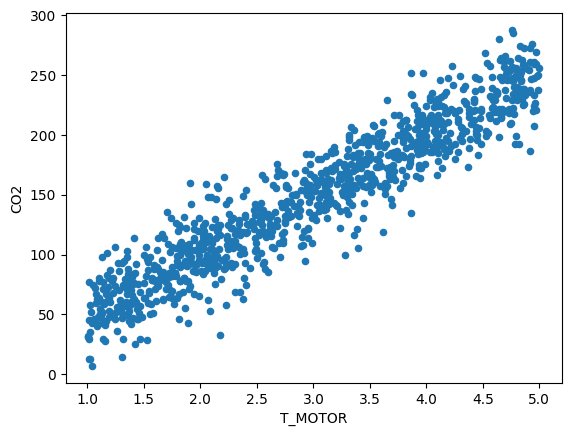

In [51]:
df.plot.scatter(x="T_MOTOR", y="CO2")

In [52]:
reg=LinearRegression()
reg.fit(df[["T_MOTOR"]],df["CO2"])

LinearRegression()

In [53]:
print(f"Se genera una intersección en la línea recta en: {reg.intercept_}  y tiene una pendiente de: {reg.coef_}")

Se genera una intersección en la línea recta en: -0.7257212836181282  y tiene una pendiente de: [50.12685718]


In [54]:
reg.coef_*df["T_MOTOR"]+reg.intercept_

,T_MOTOR
0,221.955549
1,189.429226
2,216.240317
3,212.582191
4,238.589977
...,...
995,105.483180
996,201.483051
997,56.987144
998,231.014628


In [55]:
panditas.Series(reg.predict(df[["T_MOTOR"]]))

,0
0,221.955549
1,189.429226
2,216.240317
3,212.582191
4,238.589977
...,...
995,105.483180
996,201.483051
997,56.987144
998,231.014628


In [56]:
pred=panditas.Series(reg.predict(df[["T_MOTOR"]]))

In [57]:
df["prediccion"]=pred

In [58]:
df

,T_MOTOR,CO2,prediccion
0,4.442355,247.313354,221.955549
1,3.793474,159.640840,189.429226
2,4.328339,238.683618,216.240317
3,4.255362,192.278956,212.582191
4,4.774201,255.570945,238.589977
...,...,...,...
995,2.118802,84.448284,105.483180
996,4.033941,229.371683,201.483051
997,1.151336,41.094061,56.987144
998,4.623078,219.175954,231.014628


<Axes: xlabel='T_MOTOR', ylabel='CO2'>

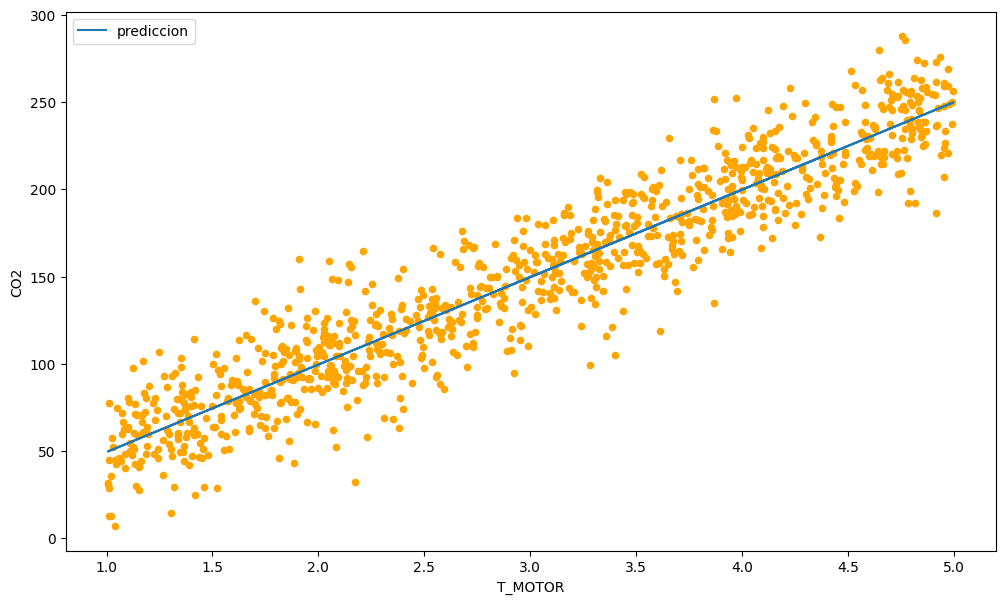

In [59]:
ax=df.plot.line(x="T_MOTOR", y="prediccion")

df.plot.scatter(x="T_MOTOR", y="CO2", ax=ax, color="orange", figsize=(12,7))

In [60]:
reg.predict([[1.40],[1.90]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([69.45187877, 94.51530736])